<a href="https://colab.research.google.com/github/Emmanuel-kabu/house_price_prediction/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing The necessary Libraries

In [ ]:
!pip install opendatasets
!pip install shap
!pip install hyperopt



# Importing all the libraries

In [ ]:

# Import the necessary libraries
import shap
import numpy as np
import pandas as pd
import seaborn as sns
import opendatasets as od
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")
%matplotlib inline

# Downloading The Dataset Using opendatasets

In [ ]:
# Download the Dataset
dataset_url = 'https://www.kaggle.com/datasets/lespin/house-prices-dataset/data'
dataset = od.download(dataset_url)



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: emmanuelkabu
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/lespin/house-prices-dataset


100%|██████████| 199k/199k [00:00<00:00, 167MB/s]

In [ ]:
import os
os.listdir(dataset)

['.config', 'house-prices-dataset', 'sample_data']

# 1. Data Understanding & Cleaning
   ## In this chapter we will explore our dataset and preprocess the dataset by doing the following
     a. Load dataset, inspect rows/columns.
     b. Handle missing values (drop/fill).
     c. Convert categorical variables (e.g., Neighborhood) into numeric (One-Hot
     Encoding).
     d. Check for outliers (e.g., huge lot size, unrealistic prices).
     e. Normalise / scale features where needed.

In [ ]:
#Load dataset into DataFrame
df = pd.read_csv('./house-prices-dataset/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Handling Missing Values

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)

print("Total missing Values:", missing_values.sum())

print("Columns with missing values:")
display(missing_df)

Total missing Values: 7829
Columns with missing values:


,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


from matplotlib import pyplot as plt
missing_df['Missing Values'].plot(kind='hist', bins=20, title='Missing Values')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
missing_df['Percentage'].plot(kind='hist', bins=20, title='Percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
missing_df.plot(kind='scatter', x='Missing Values', y='Percentage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
missing_df['Missing Values'].plot(kind='line', figsize=(8, 4), title='Missing Values')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
missing_df['Percentage'].plot(kind='line', figsize=(8, 4), title='Percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Handle missing values
# Drop columns with too many missing values (>5%)
cols_to_drop = missing_df[missing_df['Percentage'] > 5].index.tolist()
df_clean = df.drop(columns=cols_to_drop)

# Fill numerical columns with median
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_cols:
    if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Fill categorical columns with mode
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

# Verify no missing values remain
print("Remaining missing values after cleaning:", df_clean.isnull().sum().sum())
print("Dataset shape :", df_clean.shape)

Remaining missing values after cleaning: 0
Dataset shape : (1460, 69)


# Coverting Categorical features to Numerial values using One-hot encoding

In [ ]:
# Convert categorical variables using one-hot encoding
df_final = pd.get_dummies(df_clean, drop_first=True)
print("Dataset shape after one-hot encoding:", df_final.shape)

Dataset shape after one-hot encoding: (1460, 214)


# Handling and dropping outliers in SalesPrice using IQR

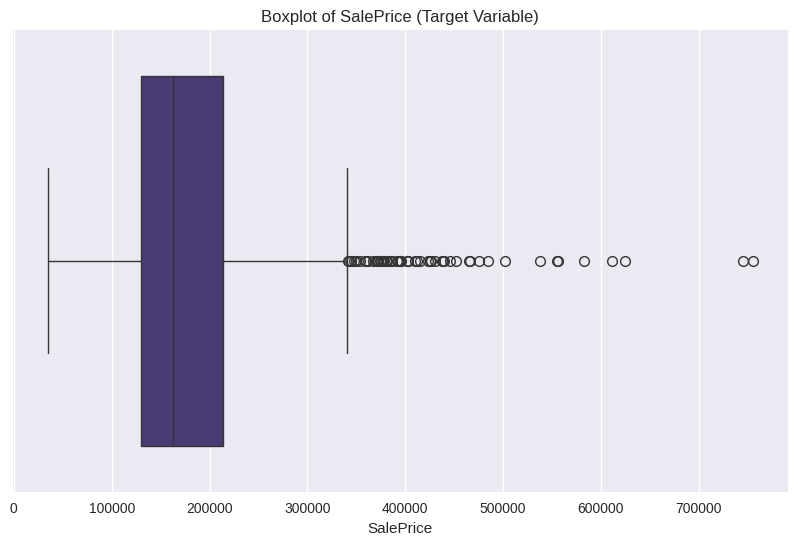

SalePrice bounds for outliers: Lower=3937.5, Upper=340037.5
Number of outliers in SalePrice: 61
Dataset shape after removing outliers: (1399, 214)


In [ ]:
# Check for outliers in the target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_final['SalePrice'])
plt.title('Boxplot of SalePrice (Target Variable)')
plt.show()

# Remove outliers in SalePrice (using IQR method)
Q1 = df_final['SalePrice'].quantile(0.25)
Q3 = df_final['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"SalePrice bounds for outliers: Lower={lower_bound}, Upper={upper_bound}")
print(f"Number of outliers in SalePrice: {((df_final['SalePrice'] < lower_bound) | (df_final['SalePrice'] > upper_bound)).sum()}")

# Remove outliers
df_final = df_final[(df_final['SalePrice'] >= lower_bound) & (df_final['SalePrice'] <= upper_bound)]
print("Dataset shape after removing outliers:", df_final.shape)

# Applying standardization to the Dataset

In [ ]:
# Normalize/scale numerical features (excluding the target variable)
scaler = StandardScaler()
X = df_final.drop('SalePrice', axis=1)
y = df_final['SalePrice']

# Scale the features
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Features scaled successfully")

Features scaled successfully


In [ ]:
# Summary statistics of numeric features
print("Summary statistics of numerical features:")
display(df_final.describe())

Summary statistics of numerical features:


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,...,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000
mean,733.508935,57.487491,10155.280915,5.983560,5.591137,1970.080772,1984.058613,89.725518,417.333095,47.478914,...,89.621158,44.892066,22.378127,3.231594,14.634024,2.482487,45.385275,6.312366,2007.819871,170237.127234
std,422.811873,42.803603,8324.834198,1.282272,1.118236,30.009463,20.661160,159.219858,428.401771,162.648530,...,121.798431,65.718951,61.454480,28.563071,54.752105,38.289681,506.746349,2.703584,1.327762,59230.130817
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,367.500000,20.000000,7442.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,739.000000,50.000000,9317.000000,6.000000,5.000000,1971.000000,1992.000000,0.000000,370.000000,0.000000,...,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,159500.000000
75%,1098.500000,70.000000,11316.500000,7.000000,6.000000,1999.000000,2003.000000,143.000000,686.000000,0.000000,...,165.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,203500.000000
max,1460.000000,190.000000,164660.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,340000.000000


#Exploratory Data Analysis (EDA)
 ## In this Chapter we will perform EDA on our cleaned Dataset to identify relationship and patterns between the input features and the target feature
   a. Summary statistics of numeric features.
   b. Correlation heatmap (which features affect price).
   c. Visualisations: scatter plot of LotArea vs SalePrice, boxplot of Neighborhood vs SalePrice.
   d. Identify most important factors (at least 3).

# Correlation heatmaps between input features and target feature

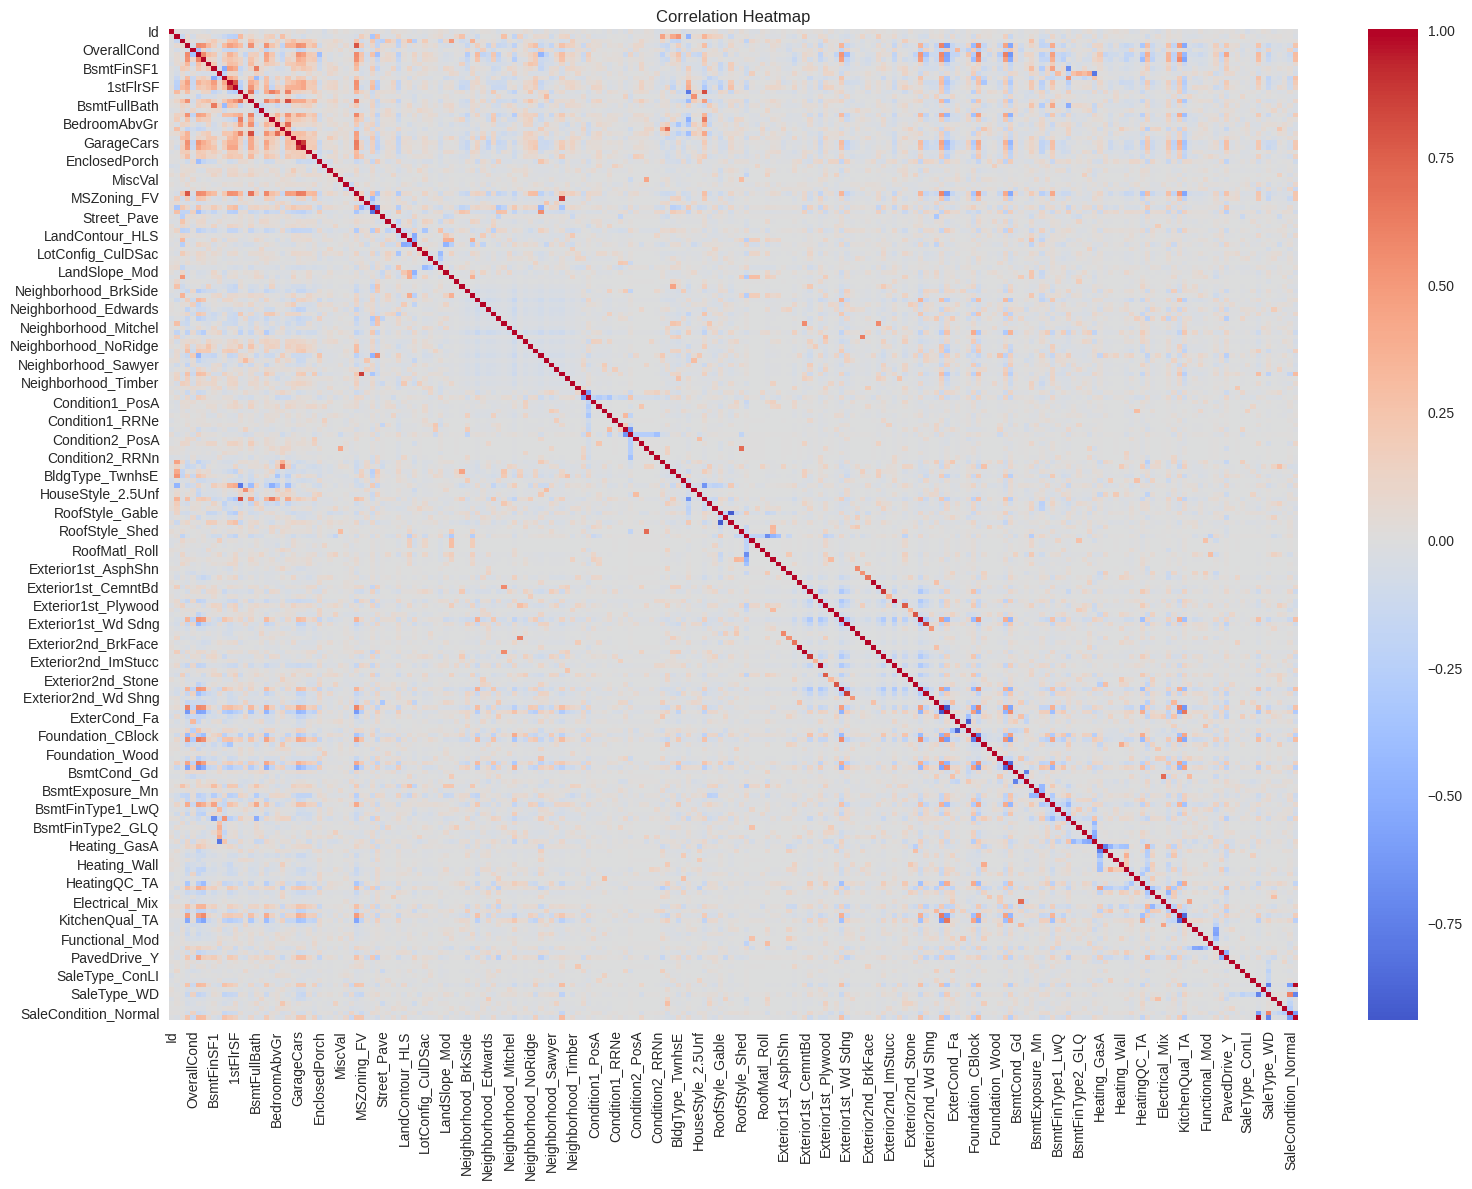

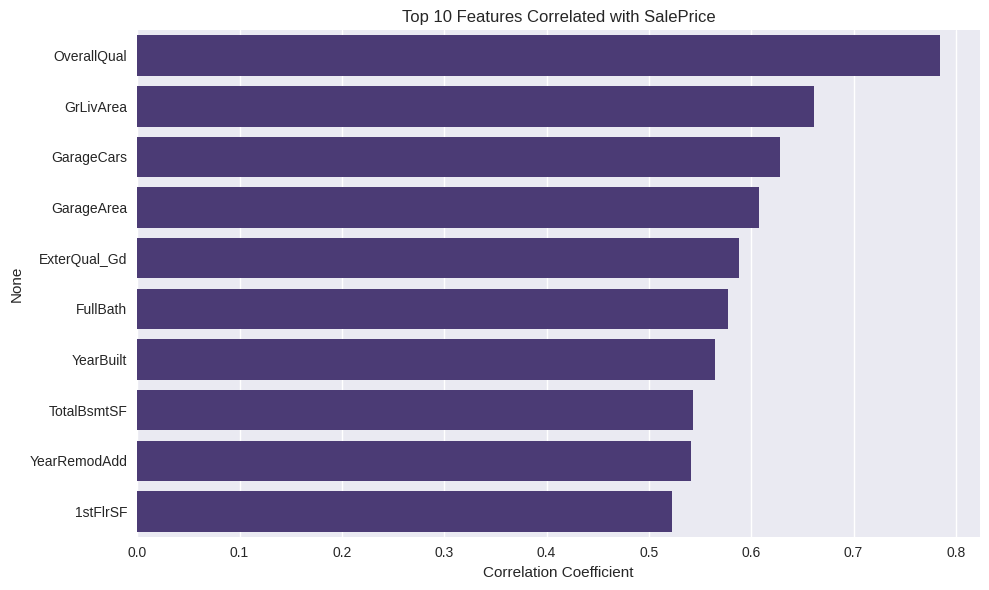

In [ ]:
# Correlation heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = df_final.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Top 10 features correlated with SalePrice
top_correlations = correlation_matrix['SalePrice'].sort_values(ascending=False).head(11)
top_correlations = top_correlations.drop('SalePrice')  # Remove self-correlation

plt.figure(figsize=(10, 6))
sns.barplot(x=top_correlations.values, y=top_correlations.index)
plt.title('Top 10 Features Correlated with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# Scatter plot of LotArea vs SalePrice

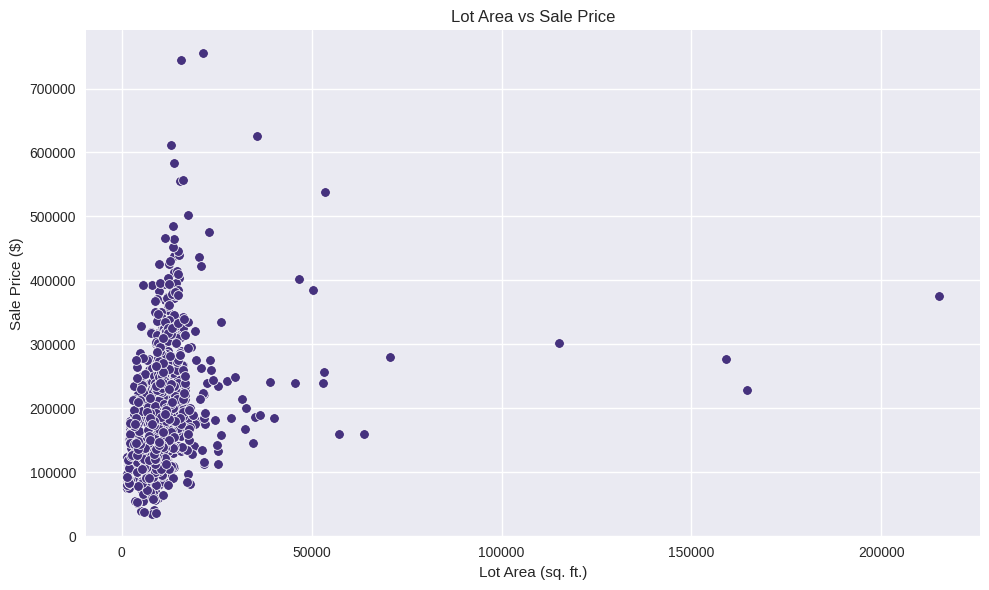

In [ ]:
# Scatter plot of LotArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_clean['LotArea'], y=df_clean['SalePrice'])
plt.title('Lot Area vs Sale Price')
plt.xlabel('Lot Area (sq. ft.)')
plt.ylabel('Sale Price ($)')
plt.tight_layout()
plt.show()

# Boxplot of Neighborhood vs SalePrice  (using original df for categorical values)

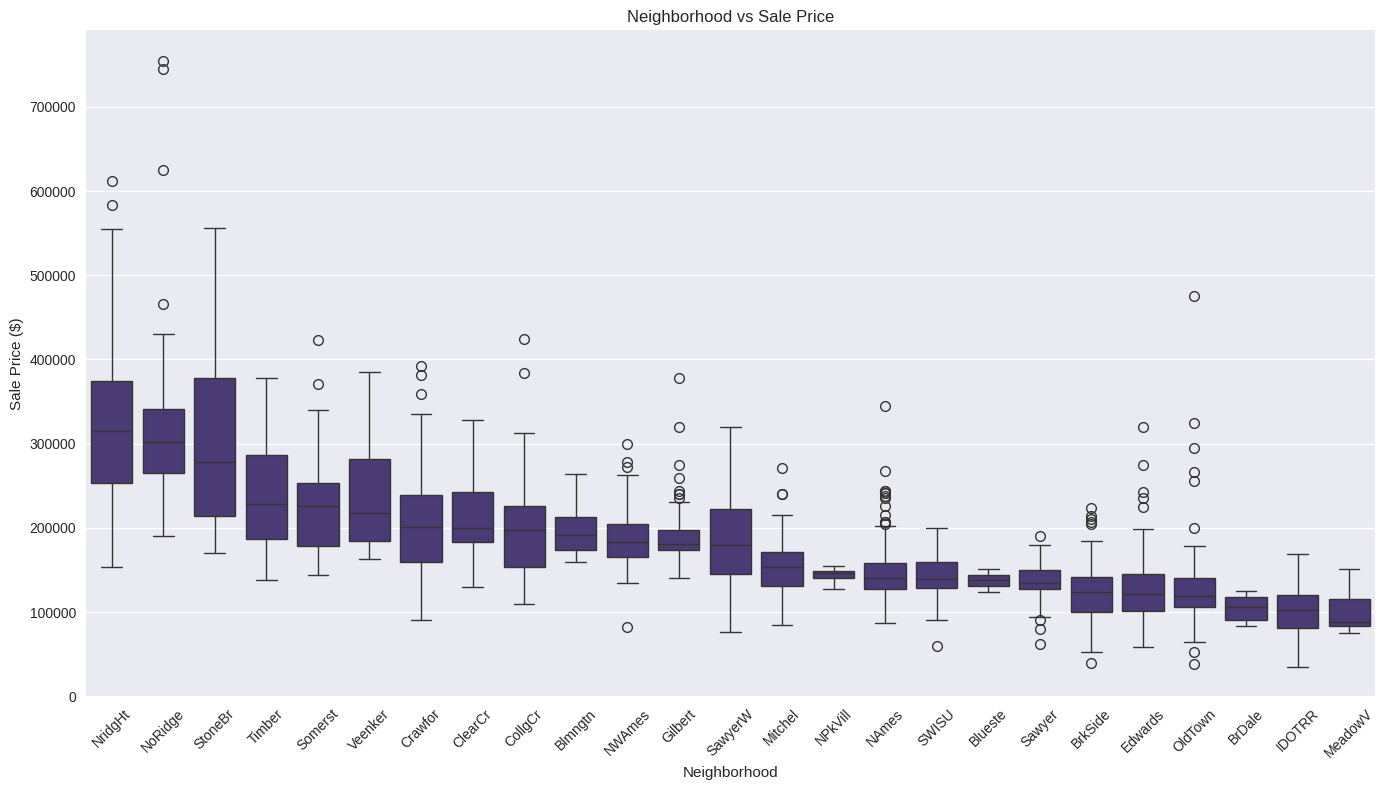

In [ ]:
# Boxplot of Neighborhood vs SalePrice
plt.figure(figsize=(14, 8))
neighborhood_order = df_clean.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False).index
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_clean, order=neighborhood_order)
plt.xticks(rotation=45)
plt.title('Neighborhood vs Sale Price')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price ($)')
plt.tight_layout()
plt.show()

In [ ]:
# Identify most important factors (based on correlation)
print("Top 3 factors affecting house prices:")
for i, (feature, corr) in enumerate(top_correlations.head(3).items(), 1):
    print(f"{i}. {feature} (Correlation: {corr:.3f})")

Top 3 factors affecting house prices:
1. OverallQual (Correlation: 0.784)
2. GrLivArea (Correlation: 0.661)
3. GarageCars (Correlation: 0.628)


# Model Building
## In this module we will train three separate models and compare their performance
# Module Activities
 ## a. Train/Test Split (e.g., 80/20).

  ## b. Train at least 3 models:
     i. Linear Regression (baseline)
     ii. Decision Tree Regressor
     iii. Random Forest Regressor
  ## c. Evaluate models using:
     i. RMSE (Root Mean Square Error)
     ii. MAE (Mean Absolute Error)
     iii. R² Score (variance explained)
  ## d. Compare results and select the best model

In [ ]:
# Train/Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (1119, 213), Test set: (280, 213)


In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=500)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    print(f"{name} Results:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R2 Score: {r2:.4f}\n")

Linear Regression Results:
  RMSE: 52542.44
  MAE: 17233.59
  R2 Score: 0.1321

Decision Tree Results:
  RMSE: 29383.47
  MAE: 21045.11
  R2 Score: 0.7286

Random Forest Results:
  RMSE: 20514.71
  MAE: 14102.06
  R2 Score: 0.8677



In [ ]:
# Compare results and select the best model
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('R2', ascending=False)

print("Model Performance Comparison:")
display(results_df)

best_model_name = results_df.index[0]
print(f"Best performing model: {best_model_name}")

Model Performance Comparison:


,RMSE,MAE,R2
Random Forest,20514.711564,14102.063600,0.867690
Decision Tree,29383.465884,21045.110714,0.728564
Linear Regression,52542.443215,17233.594892,0.132076


Best performing model: Random Forest


from matplotlib import pyplot as plt
results_df['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['R2'].plot(kind='hist', bins=20, title='R2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='RMSE', y='MAE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='MAE', y='R2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RMSE']
  ys = series['MAE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('RMSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('MAE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RMSE']
  ys = series['R2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('RMSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('R2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['RMSE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'RMSE'}, axis=1)
              .sort_values('RMSE', ascending=True))
  xs = counted['RMSE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('RMSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
results_df['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['R2'].plot(kind='line', figsize=(8, 4), title='R2')
plt.gca().spines[['top', 'right']].set_visible(False)

#Model Tuning & Feature Importance
## In this module we will tune the hyparameters manually and with hyperopt(popular hyperparameter optimization package). We will also Extract features based on importance score manually and with SHAP

# Module Activities

  ## a. Tune hyperparameters of the best model (e.g., tree depth, number of estimators).
  ## b. Analyse feature importance (which features drive prices most).
  ## c. Visualise top features (bar chart).

#Hyperparameter Tuning(Manually)

In [ ]:
# Hyperparameter tuning for the best model (Random Forest)
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)

    # Use the best model
    best_model = grid_search.best_estimator_

elif best_model_name == 'Decision Tree':
    param_grid = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    dt = DecisionTreeRegressor(random_state=42)
    grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)

    # Use the best model
    best_model = grid_search.best_estimator_

else:
    # For Linear Regression, no hyperparameter tuning needed
    best_model = models[best_model_name]

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best R2 score: 0.8575749546045184


# Analyzing and Extracting Important Features(Manually)

In [ ]:
# Analyze feature importance
if hasattr(best_model, 'feature_importances_'):
    # For tree-based models
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

else:
    # For Linear Regression
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': np.abs(best_model.coef_)
    }).sort_values('importance', ascending=False)

# Display top 10 features
print("Top 10 Most Important Features:")
display(feature_importance.head(10))

Top 10 Most Important Features:


,feature,importance
3,OverallQual,0.547104
15,GrLivArea,0.133127
11,TotalBsmtSF,0.059370
25,GarageArea,0.033022
8,BsmtFinSF1,0.025331
2,LotArea,0.022001
12,1stFlrSF,0.019734
5,YearBuilt,0.018039
24,GarageCars,0.015277
23,Fireplaces,0.012652


from matplotlib import pyplot as plt
_df_0['importance'].plot(kind='hist', bins=20, title='importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['importance'].plot(kind='line', figsize=(8, 4), title='importance')
plt.gca().spines[['top', 'right']].set_visible(False)

# Visualizing Top important Features

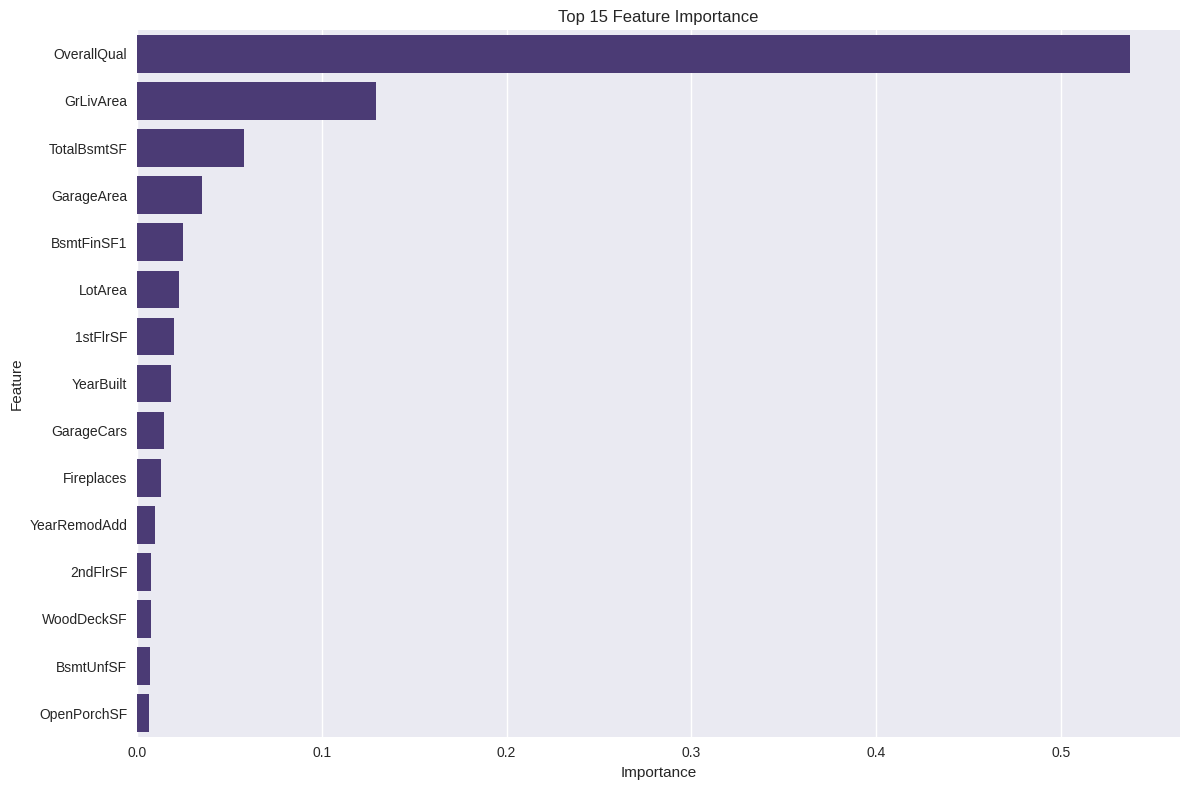

In [ ]:
# Visualize top features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# 1. Save cleaned dataset
df_final.to_csv('cleaned_house_prices.csv', index=False)

# 2. Save visualizations
# Correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()

# Feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.close()

#HyperParameter Tuning With hyperopt

In [ ]:
# Features & target
X = df_final.drop("SalePrice", axis=1)
y = df_final["SalePrice"]

# define the space
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 50),   # number of trees
    'max_depth': hp.quniform('max_depth', 5, 50, 1),              # tree depth
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1), # split rule
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 20, 1),   # leaf rule
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None]), # feature selection
    'bootstrap': hp.choice('bootstrap', [True, False])             # bootstrap sampling
}

# Objective Function
def objective(params):
    model = RandomForestRegressor(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=int(params['min_samples_leaf']),
        max_features=params['max_features'],
        bootstrap=params['bootstrap'],
        random_state=42,
        n_jobs=-1
    )

    # Negative RMSE for Hyperopt (it minimizes loss)
    rmse = -cross_val_score(model, X, y, scoring="neg_root_mean_squared_error", cv=5).mean()

    return {'loss': rmse, 'status': STATUS_OK}

# Run Hyperopt
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=500,
    trials=trials,
    rstate=np.random.default_rng(42)
)

print("Best hyperparameters:", best)

100%|██████████| 40/40 [19:48<00:00, 29.72s/trial, best loss: 21546.427142270382]
Best hyperparameters: {'bootstrap': np.int64(0), 'max_depth': np.float64(28.0), 'max_features': np.int64(2), 'min_samples_leaf': np.float64(2.0), 'min_samples_split': np.float64(6.0), 'n_estimators': np.float64(950.0)}


# Retraining Model With Tuned Hyperparameters

In [ ]:
#Initialiing the model with best parameters
best_model = RandomForestRegressor(
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    min_samples_split=int(best['min_samples_split']),
    min_samples_leaf=int(best['min_samples_leaf']),
    max_features=['sqrt', 'log2', None][best['max_features']],
    bootstrap=[True, False][best['bootstrap']],
    random_state=42,
    n_jobs=-1
)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Metrics
# Calculate RMSE by taking the square root of mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Optimized Random Forest Results:\n  RMSE: {rmse:.2f}\n  MAE: {mae:.2f}\n  R² Score: {r2:.4f}")

Optimized Random Forest Results:
  RMSE: 20430.94
  MAE: 14016.27
  R² Score: 0.8688


From the metrics above, we can see an improvement compared to the mannually optimized Random Forest parameters

# Visualizing Learning Curve( to determined overfitting or underfitting)

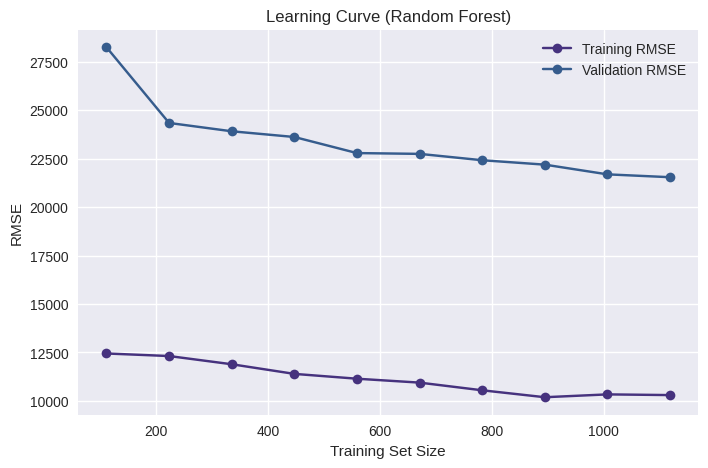

In [ ]:

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, label="Training RMSE", marker='o')
plt.plot(train_sizes, test_mean, label="Validation RMSE", marker='o')
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curve (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()


“The learning curve above indicates moderate overfitting: training RMSE is much lower than validation RMSE. However, the validation curve is still trending downward, suggesting that adding more data or applying stronger regularization could further improve generalization. Another options is to try Boosting Models
such as Gradient Boosting or XGBoost or LightGBM”

# Feature Importance With SHAP

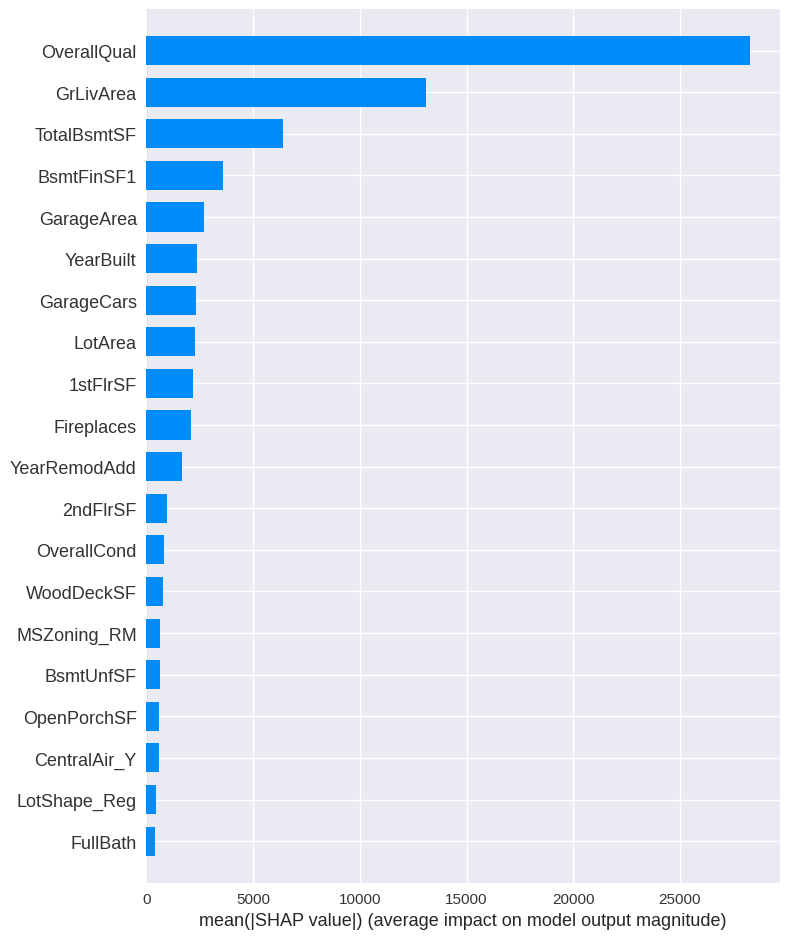

In [ ]:
import shap

# Create explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Summary plot (global importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")


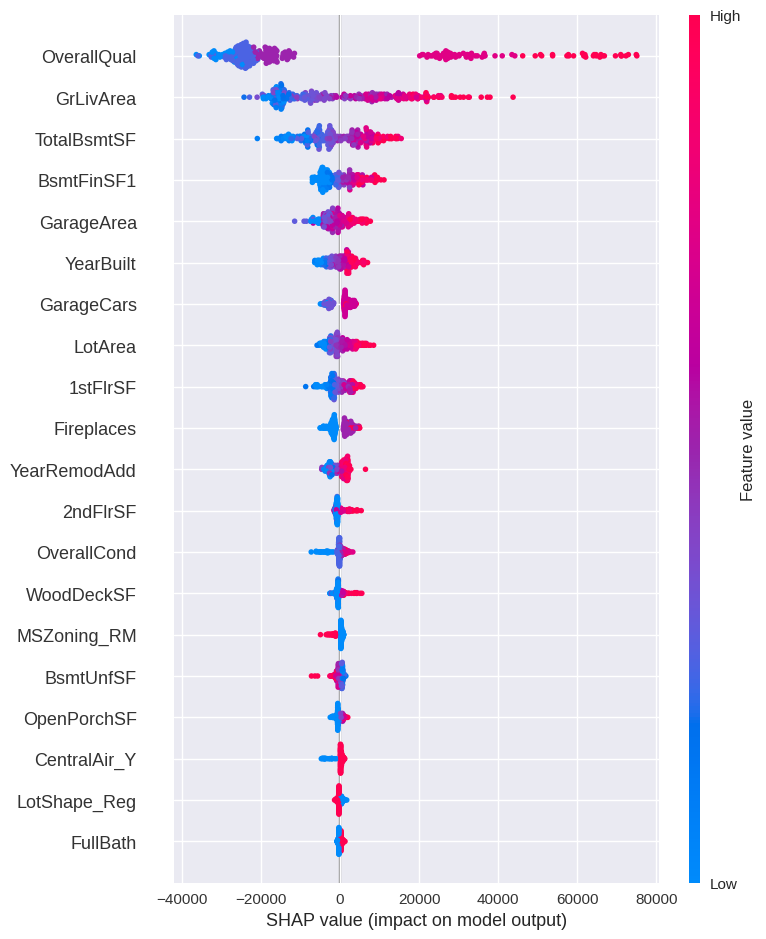

In [ ]:
shap.summary_plot(shap_values, X_test)


In [ ]:
#Explain first prediction
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[0,:],
    X_test.iloc[0,:]
)


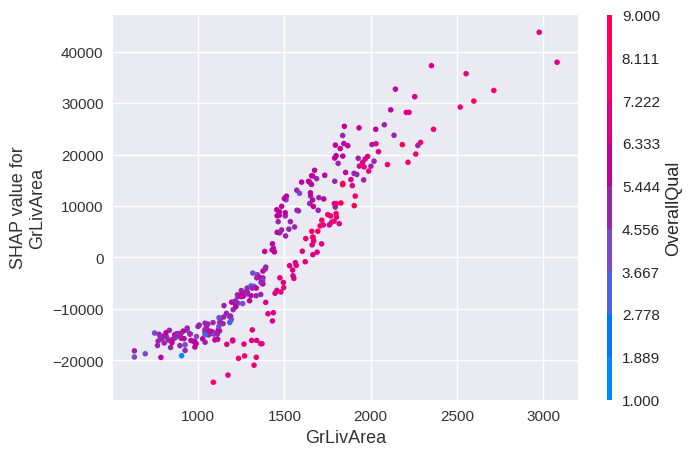

In [ ]:
shap.dependence_plot("GrLivArea", shap_values, X_test)

# Saving Deliverables

In [ ]:
# 1. Save cleaned dataset
df_final.to_csv('cleaned_house_prices.csv', index=False)

# 2. Save visualizations
# Correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()

# Feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.close()

In [ ]:
#Load the saved clean dataset
cleaned_saved_dataset = pd.read_csv('cleaned_house_prices.csv')
cleaned_saved_dataset


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,1456,60,7917,6,5,1999,2000,0.0,0,0,...,False,False,False,False,True,False,False,False,True,False
1395,1457,20,13175,6,6,1978,1988,119.0,790,163,...,False,False,False,False,True,False,False,False,True,False
1396,1458,70,9042,7,9,1941,2006,0.0,275,0,...,False,False,False,False,True,False,False,False,True,False
1397,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,False,False,False,False,True,False,False,False,True,False
